In [1]:
#20BCE0969

import pandas as pd
import numpy as np
from sklearn import tree
from matplotlib import pyplot as plt
%matplotlib inline

In [2]:
df=pd.read_csv('data.csv')

In [3]:
df

,Age,Job,House,Credit,Loan Approved
0,Young,False,No,Fair,No
1,Young,False,No,Good,No
2,Young,True,No,Good,Yes
3,Young,False,No,Fair,No
4,Middle,False,No,Fair,No
5,Middle,False,No,Good,No
6,Middle,True,Yes,Good,Yes
7,Middle,False,Yes,Excellent,Yes
8,Middle,False,Yes,Excellent,Yes
9,Old,False,Yes,Excellent,Yes


In [4]:
attr=df.columns.values[0:-1]
target=df[df.columns.values[-1]].values.tolist()
data=df[attr]

In [5]:
data=np.array(data)

In [6]:
for i in range(len(data)):
    if data[i][0]=='Young':
        data[i][0]=2
    elif data[i][0]=='Middle':
        data[i][0]=0
    else:
        data[i][0]=1
    
    if data[i][2]=='No':
        data[i][2]=0
    else:
        data[i][2]=1
    if data[i][3]=='Excellent':
        data[i][3]=0
    elif data[i][3]=='Fair':
        data[i][3]=1
    else:
        data[i][3]=2

In [7]:
print('Modified Dataset: (Each categorical attribute is represented by a number):')
print()
print('Instances:\n',data)
print()
print('Target variable: ',target)

Modified Dataset: (Each categorical attribute is represented by a number):

Instances:
 [[2 False 0 1]
 [2 False 0 2]
 [2 True 0 2]
 [2 False 0 1]
 [0 False 0 1]
 [0 False 0 2]
 [0 True 1 2]
 [0 False 1 0]
 [0 False 1 0]
 [1 False 1 0]
 [1 False 1 2]
 [1 True 0 2]
 [1 True 0 0]
 [1 False 0 1]]

Target variable:  ['No', 'No', 'Yes', 'No', 'No', 'No', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'No']


In [8]:
clf=tree.DecisionTreeClassifier(criterion='gini',random_state=0)
clf=clf.fit(data,target)

[Text(0.6, 0.8333333333333334, 'House <= 0.5\ngini = 0.49\nsamples = 14\nvalue = [6, 8]\nclass = Yes'),
 Text(0.4, 0.5, 'Job <= 0.5\ngini = 0.444\nsamples = 9\nvalue = [6, 3]\nclass = No'),
 Text(0.2, 0.16666666666666666, 'gini = 0.0\nsamples = 6\nvalue = [6, 0]\nclass = No'),
 Text(0.6, 0.16666666666666666, 'gini = 0.0\nsamples = 3\nvalue = [0, 3]\nclass = Yes'),
 Text(0.8, 0.5, 'gini = 0.0\nsamples = 5\nvalue = [0, 5]\nclass = Yes')]

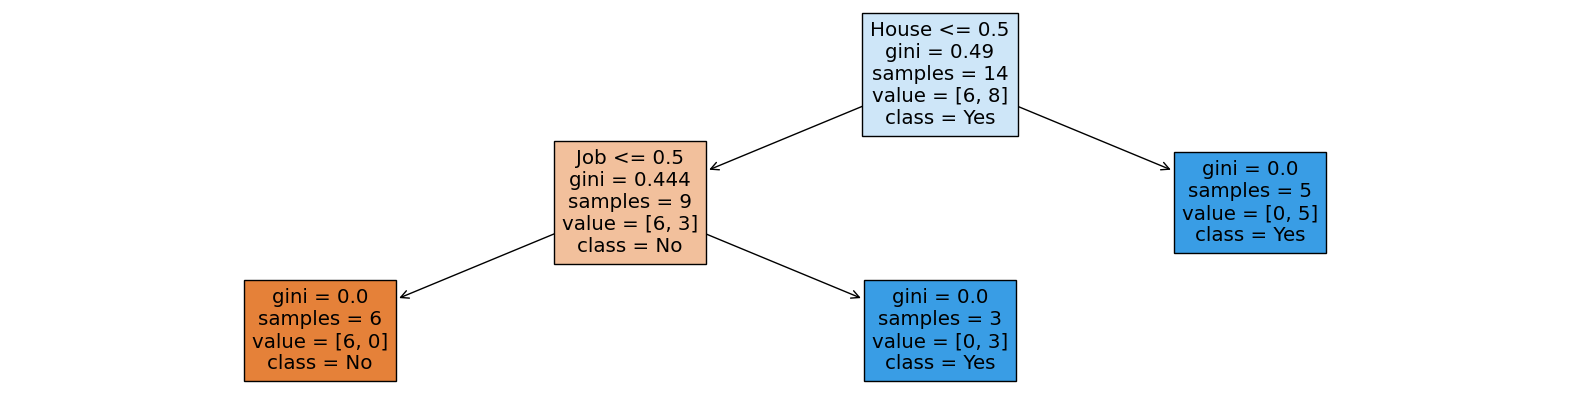

In [9]:
plt.figure(figsize=(20,5))
tree.plot_tree(clf,filled=True,feature_names=attr.tolist(),class_names=['No','Yes'])

In [10]:
#PREDICTION

age=2 #Young
job=False
house=0 #No
credit=2  #Good
pred=clf.predict([[age,job,house,credit]])[0]

In [11]:
print('Prediction as per the CART decision tree:')
print('Loan Approved: ',pred)

Prediction as per the CART decision tree:
Loan Approved:  No
